In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from mach.data import read_txt_file

In [4]:
label_path = "video_data/train.txt"
labels = read_txt_file(label_path)
print(len(labels))

20400


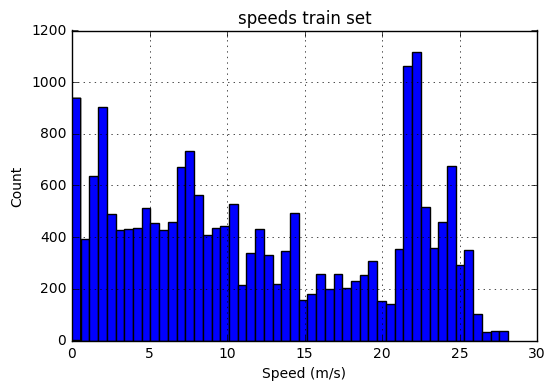

In [6]:
plt.hist(labels, 50)
plt.xlabel('Speed (m/s)')
plt.ylabel('Count')
plt.title('speeds train set')
plt.grid(True)

plt.show()

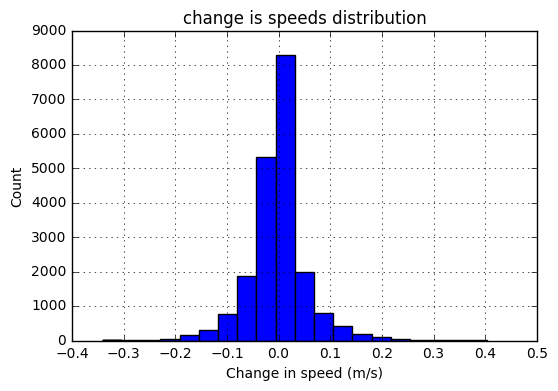

In [23]:
dv = np.array([labels[i]-labels[i-1] for i in range(1, len(labels))])
plt.hist(dv,20)
plt.xlabel('Change in speed (m/s)')
plt.ylabel('Count')
plt.title('change is speeds distribution')
plt.grid(True)

plt.show()

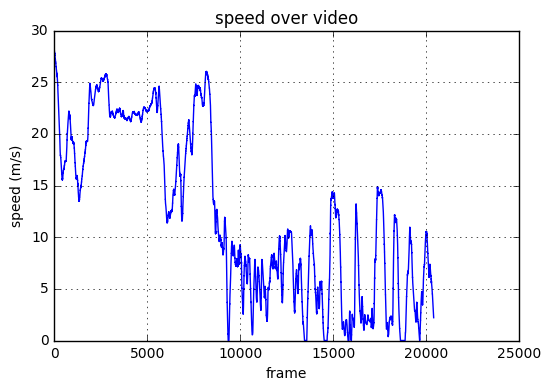

In [24]:
plt.plot(labels)
plt.xlabel('frame')
plt.ylabel('speed (m/s)')
plt.title('speed over video')
plt.grid(True)
plt.show()

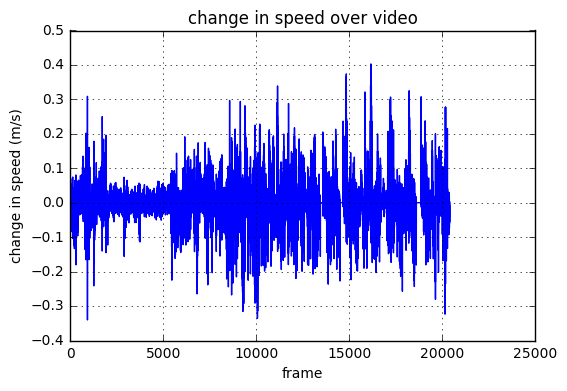

In [27]:
plt.plot(dv)
plt.xlabel('frame')
plt.ylabel('change in speed (m/s)')
plt.title('change in speed over video')
plt.grid(True)
plt.show()

mse: 3.09797204712
error for speeds below 26 (m/s): 3.07699158098
mse w/o large errors: 2.83538864367


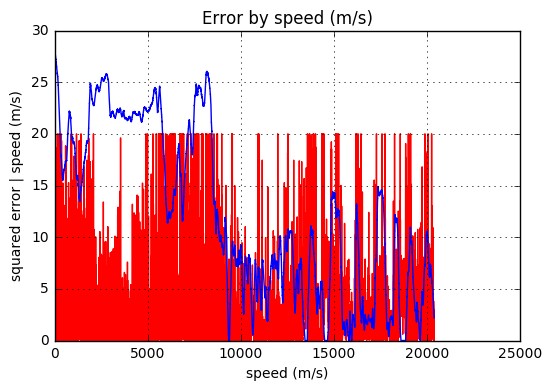

In [85]:
train_labels = read_txt_file("video_data/train.txt")
train_predictions = read_txt_file("results_train.txt")
error = np.square(train_labels - train_predictions)

print("mse:", np.mean(error))

max_errors_idx = [i for i in range(len(error)) if error[i] > 20]
max_errors = list(zip(train_labels[max_errors_idx], train_predictions[max_errors_idx], error[max_errors_idx]))

low_speed_error = [error[i] for i in range(len(error)) if labels[i] < 25.]
print("error for speeds below 26 (m/s):", np.mean(low_speed_error))

clipped_error = np.copy(error)
clipped_error[max_errors_idx] = 20

print("mse w/o large errors:", np.mean(clipped_error))

plt.plot(clipped_error, 'r')
plt.plot(train_labels, 'b')
plt.xlabel('speed (m/s)')
plt.ylabel('squared error | speed (m/s)')
plt.title('Error by speed (m/s)')
plt.grid(True)
plt.show()

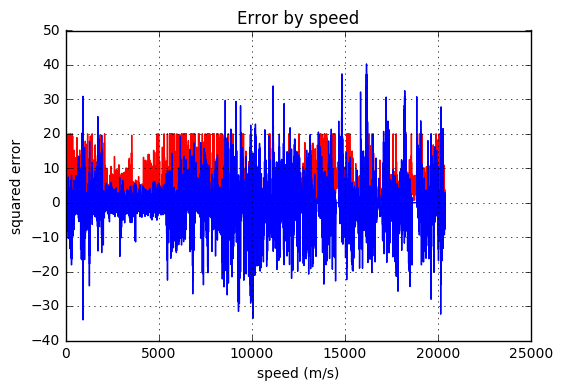

In [51]:
plt.plot(clipped_error, 'r')
plt.plot(dv*100, 'b')
plt.xlabel('speed (m/s)')
plt.ylabel('squared error')
plt.title('Error by speed')
plt.grid(True)
plt.show()

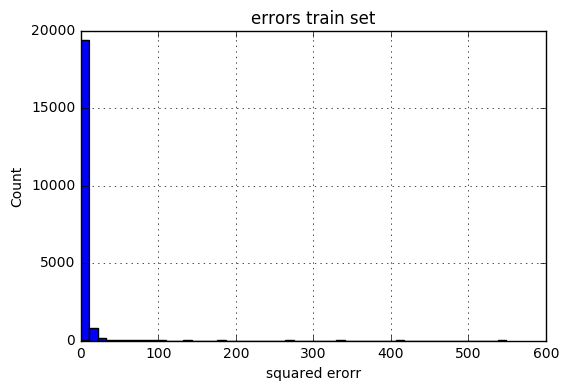

In [52]:
plt.hist(error, 50)
plt.xlabel('squared erorr')
plt.ylabel('Count')
plt.title('errors train set')
plt.grid(True)

plt.show()

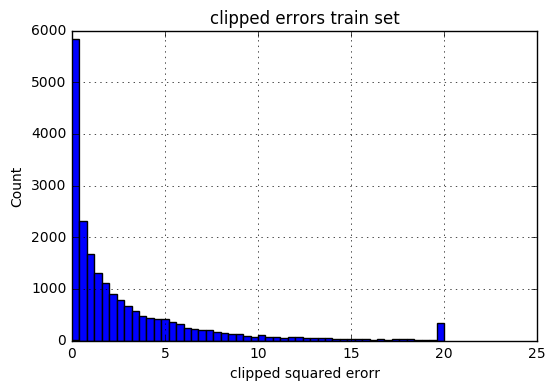

In [53]:
plt.hist(clipped_error, 50)
plt.xlabel('clipped squared erorr')
plt.ylabel('Count')
plt.title('clipped errors train set')
plt.grid(True)

plt.show()

In [56]:
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import MinMaxScaler

error_scaler = MinMaxScaler((-1., 1.))
dv_scaler = MinMaxScaler((-1., 1.))
speed_scaler = MinMaxScaler((-1., 1.))
clipped_error_scaler = MinMaxScaler((-1., 1.))

error_scaler.fit(error)
dv_scaler.fit(dv)
speed_scaler.fit(labels)
clipped_error_scaler.fit(clipped_error)

scaled_error = error_scaler.transform(error)
scaled_dv = error_scaler.transform(dv)
scaled_speed = error_scaler.transform(labels)
scaled_clipped_error = clipped_error_scaler.transform(clipped_error)

print("error_speed correlation:", np.corrcoef(scaled_error, scaled_speed)[0, 1])
print("error_dv correlation:", np.corrcoef(scaled_error[1:], scaled_dv)[0,1])
print("clipped_error_speed correlation:", np.corrcoef(scaled_clipped_error, scaled_speed)[0, 1])
print("clipped_error_dv correlation:", np.corrcoef(scaled_clipped_error[1:], scaled_dv)[0,1])

error_speed correlation: 0.05196715261
error_dv correlation: -0.00248838362511
clipped_error_speed correlation: 0.0397015094831
clipped_error_dv correlation: 0.0166153306566


/Users/kyledorman/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/kyledorman/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/kyledorman/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(

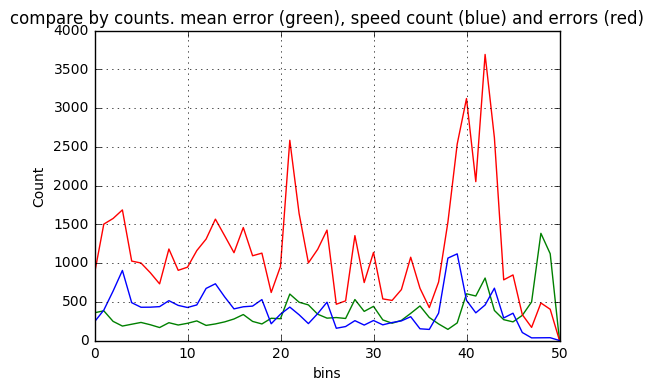

bin_edges: [ 25.3173636   25.87997168  26.44257976  27.00518784  27.56779592
  28.130404  ]


In [81]:
hist = np.histogram(labels, bins=50)
bin_edges = hist[1]
count_errors_by_speed_hist = np.zeros(len(bin_edges))
count_errors = np.zeros(len(bin_edges)) + 0.00001
count_speeds = np.zeros(len(bin_edges))
for i in range(len(labels)):
  for j in range(1,len(bin_edges)):
    if labels[i] > bin_edges[j-1] and labels[i] < bin_edges[j]:
      count_errors_by_speed_hist[j-1] += error[i]
      count_errors[j-1] += 1.
      count_speeds[j-1] += 1

plt.plot(100*count_errors_by_speed_hist/count_errors, 'g')
plt.plot(count_errors_by_speed_hist, 'r')
plt.plot(count_speeds, 'b')
plt.xlabel('bins')
plt.ylabel('Count')
plt.title('compare by counts. mean error (green), speed count (blue) and errors (red)')
plt.grid(True)
plt.show()

print("bin_edges:", bin_edges[-6:])